# Brain Tumor Classification Task
Alessio Carnevale, Manuel Cattoni, Carlo Schillaci

Dataset link: [Kaggle](https://www.kaggle.com/datasets/pkdarabi/brain-tumor-image-dataset-semantic-segmentation/data)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import skimage

from functions import display_images_by_category, display_image_with_annotations, display_images_with_coco_annotations, visualize_annotation_mask, create_mask, sample_annotation_mask_pixels, extract_patches
from skimage import io
import os


import kagglehub
import random

/Users/carlo/Desktop/suspi_appunti/programming_folders/CompVision/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Download latest version
path = kagglehub.dataset_download("pkdarabi/brain-tumor-image-dataset-semantic-segmentation")

print("Path to dataset files:", path)

Path to dataset files: /Users/carlo/.cache/kagglehub/datasets/pkdarabi/brain-tumor-image-dataset-semantic-segmentation/versions/1


In [3]:
# Load the annotations file
with open('Dataset/train/_annotations.coco.json', 'r') as file:
    annotations = json.load(file)

# Print the JSON content in a readable format
print(json.dumps(annotations, indent=4))

{
    "info": {
        "year": "2023",
        "version": "1",
        "description": "Exported from roboflow.com",
        "contributor": "",
        "url": "https://public.roboflow.com/object-detection/undefined",
        "date_created": "2023-08-19T04:37:54+00:00"
    },
    "licenses": [
        {
            "id": 1,
            "url": "https://creativecommons.org/licenses/by/4.0/",
            "name": "CC BY 4.0"
        }
    ],
    "categories": [
        {
            "id": 0,
            "name": "Tumor",
            "supercategory": "none"
        },
        {
            "id": 1,
            "name": "0",
            "supercategory": "Tumor"
        },
        {
            "id": 2,
            "name": "1",
            "supercategory": "Tumor"
        }
    ],
    "images": [
        {
            "id": 0,
            "license": 1,
            "file_name": "2256_jpg.rf.3afd7903eaf3f3c5aa8da4bbb928bc19.jpg",
            "height": 640,
            "width": 640,
            "da

In [4]:
with open('Dataset/train/_annotations.coco.json','r') as file:
    train = json.load(file)

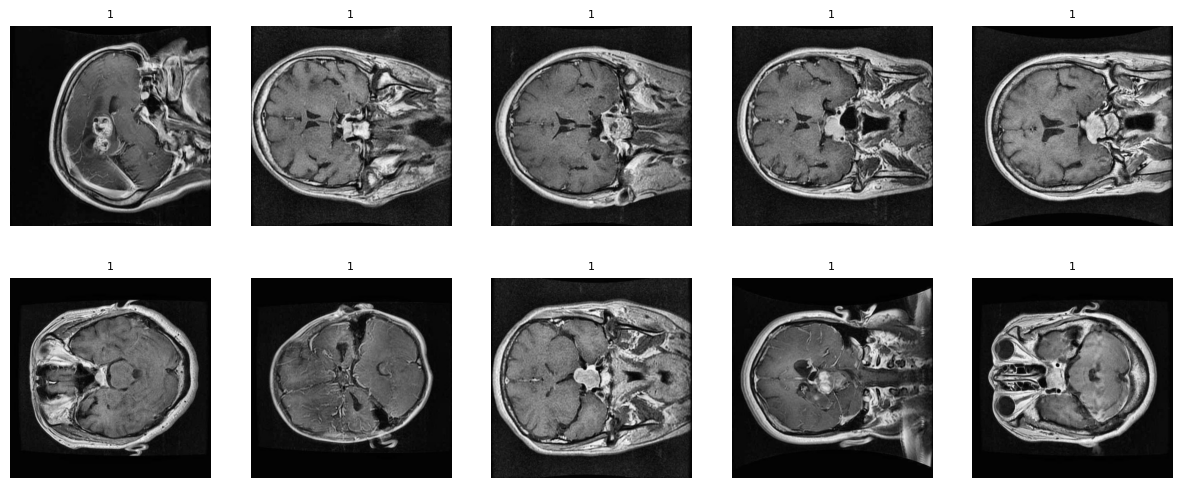

In [5]:
random_images = random.sample(train['images'], 10)

plt.figure(figsize=(15, 6))

for i, img_info in enumerate(random_images):
    img_path = os.path.join('Dataset/train', img_info['file_name'])
    
    img = io.imread(img_path)

    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(img_info['license'], fontsize=8)
    plt.axis('off')

plt.show()

JSON description for 2645_jpg.rf.f7c57df2206e65eb1808439eef24df20.jpg:
{'id': 1442, 'license': 1, 'file_name': '2645_jpg.rf.f7c57df2206e65eb1808439eef24df20.jpg', 'height': 640, 'width': 640, 'date_captured': '2023-08-19T04:37:54+00:00'}
JSON description for 1274_jpg.rf.554265add700de2e86de195f0e46e2f2.jpg:
{'id': 170, 'license': 1, 'file_name': '1274_jpg.rf.554265add700de2e86de195f0e46e2f2.jpg', 'height': 640, 'width': 640, 'date_captured': '2023-08-19T04:37:54+00:00'}
JSON description for 1604_jpg.rf.8984e0f1b257ec27222b3f059145e7a7.jpg:
{'id': 1344, 'license': 1, 'file_name': '1604_jpg.rf.8984e0f1b257ec27222b3f059145e7a7.jpg', 'height': 640, 'width': 640, 'date_captured': '2023-08-19T04:37:54+00:00'}
JSON description for 1307_jpg.rf.29e7c66b9790a3f5b00595e8e035a453.jpg:
{'id': 1043, 'license': 1, 'file_name': '1307_jpg.rf.29e7c66b9790a3f5b00595e8e035a453.jpg', 'height': 640, 'width': 640, 'date_captured': '2023-08-19T04:37:54+00:00'}
JSON description for 1046_jpg.rf.f00d24546cfc9932

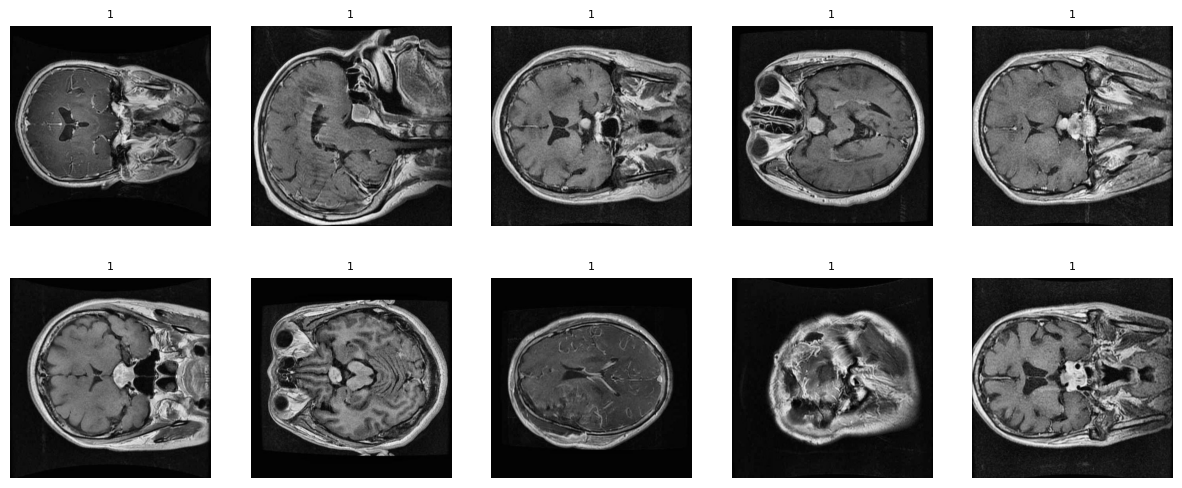

In [6]:
random_images = random.sample(train['images'], 10)

plt.figure(figsize=(15, 6))

for i, img_info in enumerate(random_images):
    img_path = os.path.join('Dataset/train', img_info['file_name'])
    
    img = io.imread(img_path)

    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(img_info['license'], fontsize=8)
    plt.axis('off')

    # Print the full JSON description for the image
    print(f"JSON description for {img_info['file_name']}:")
    print(img_info)

plt.show()

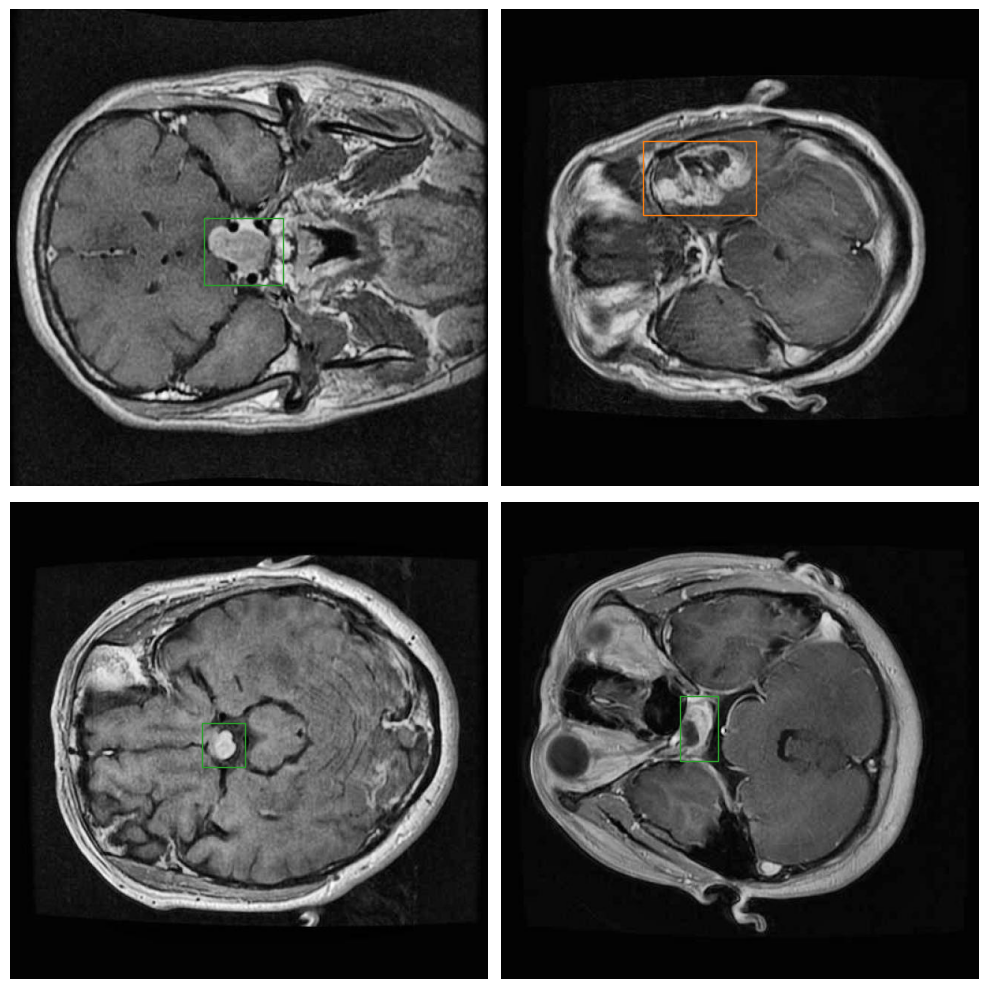

In [7]:
all_image_files = [os.path.join('Dataset/train', img['file_name']) for img in train['images']]
random_image_files = random.sample(all_image_files, 4)

# Choose between 'bbox', 'seg', or 'both'
display_type = 'seg'
display_images_with_coco_annotations(random_image_files, train, display_type)

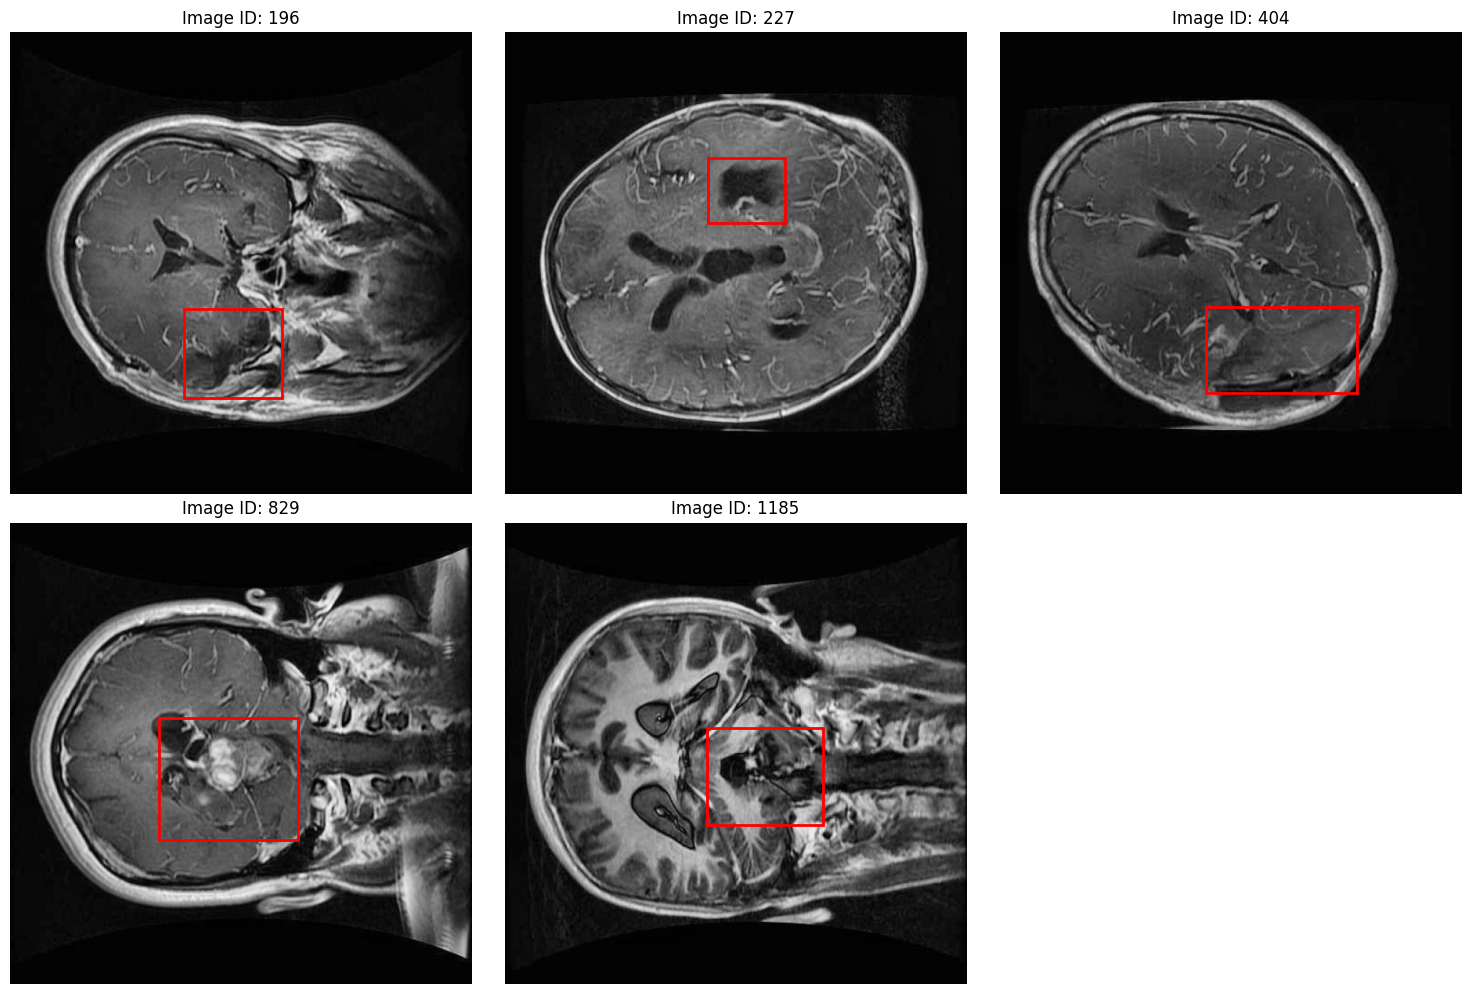

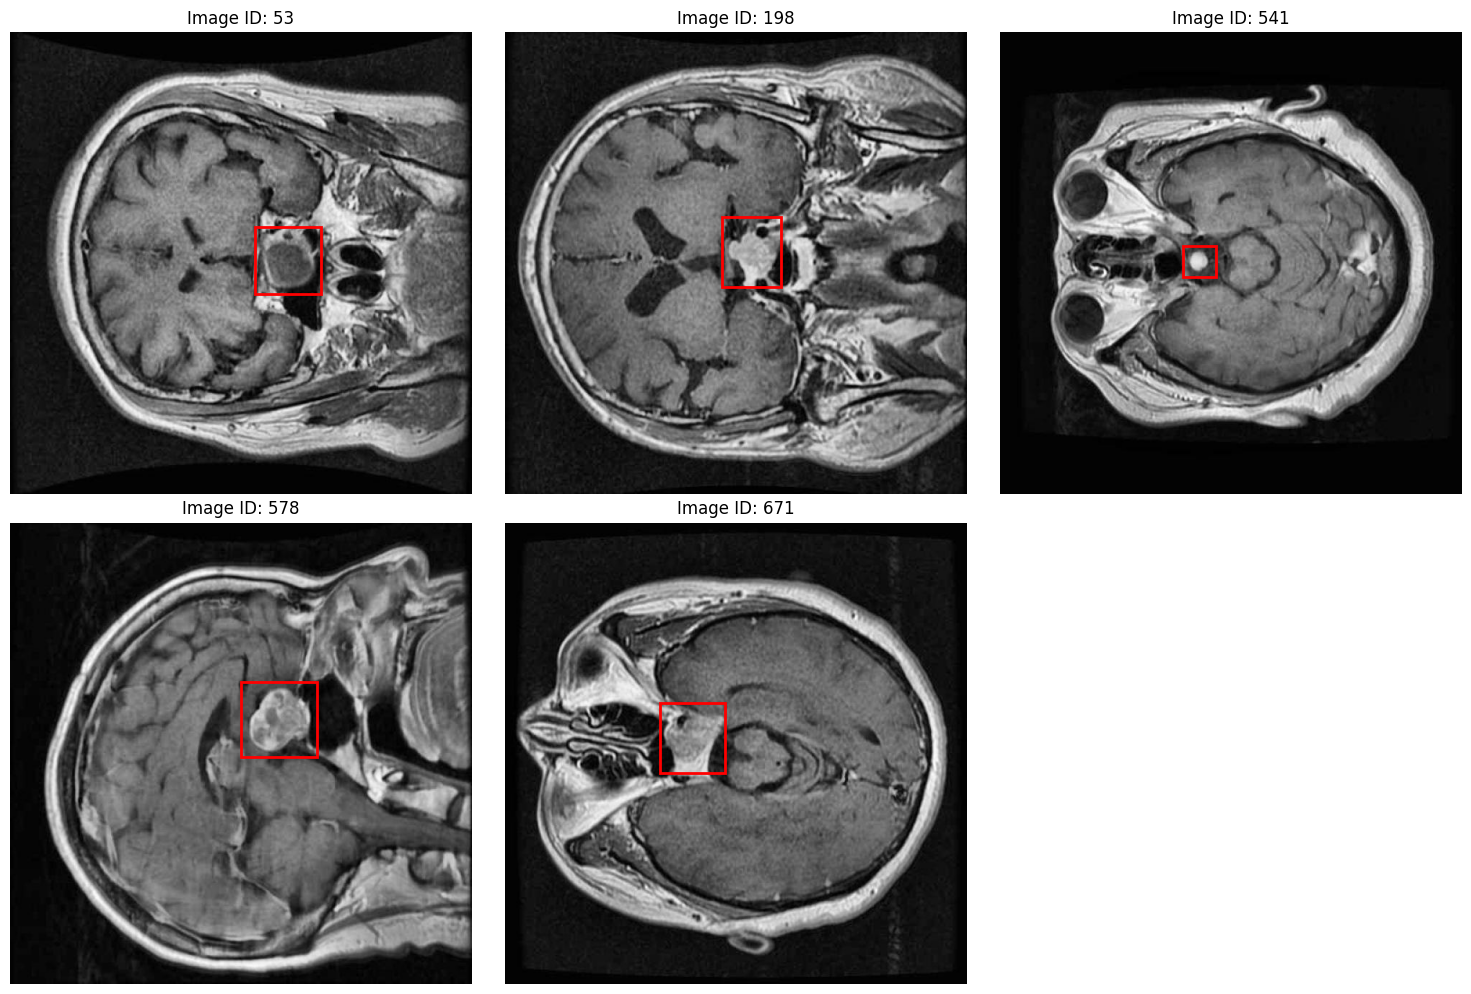

In [8]:
# Display 5 random images for category_id = 1
display_images_by_category(train, category_id=1, num_images=5)

# Display 5 random images for category_id = 2
display_images_by_category(train, category_id=2, num_images=5)

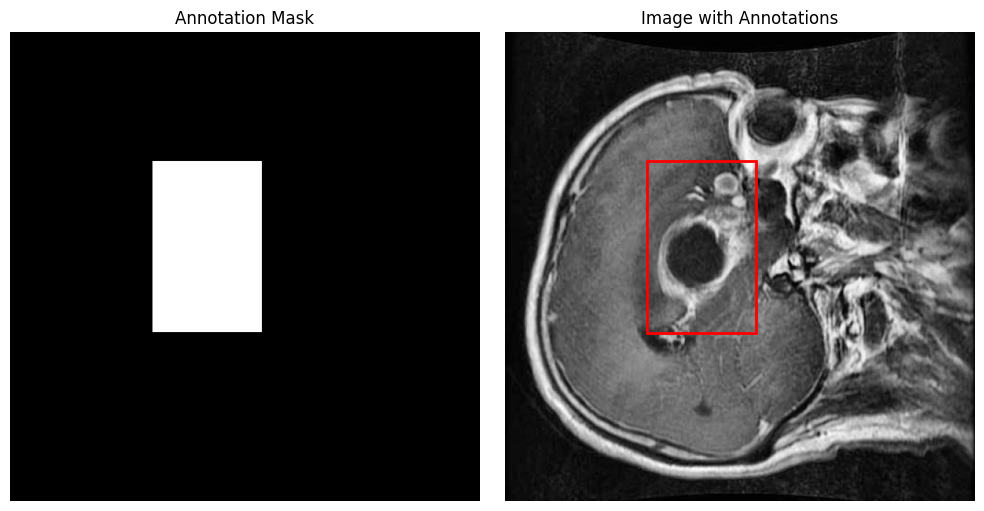

In [9]:
# Example usage
visualize_annotation_mask(train, image_id=1, show_annotations=True)

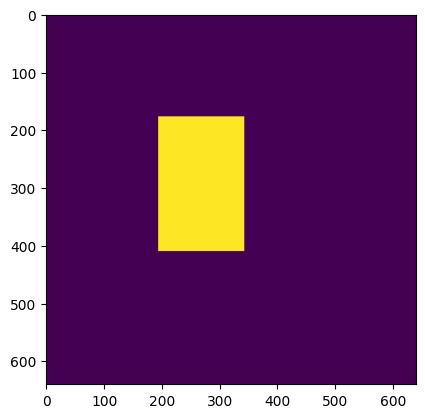

In [10]:
test_mask = create_mask(train, image_id=1)
plt.imshow(test_mask)

In [11]:
image_id = 1
# mask = create_mask(train, image_id=1)

# samples = sample_annotation_mask_pixels(
#     mask, num_true=3, num_false=3, random_state=42
# )

# plt.figure(figsize=(6, 6))
# plt.imshow(mask, cmap='gray')
# plt.scatter(
#     [coord[1] for coord in samples["true"]],
#     [coord[0] for coord in samples["true"]],
#     marker='o',
#     color='lime',
#     label='true pixels',
#     s=60,
# )
# plt.scatter(
#     [coord[1] for coord in samples["false"]],
#     [coord[0] for coord in samples["false"]],
#     marker='x',
#     color='red',
#     label='false pixels',
#     s=60,
# )
# plt.legend()
# plt.title(f"Sampled pixels for image_id={image_id}")
# plt.axis('off')
# plt.show()

# print("True pixels:", samples["true"])
# print("False pixels:", samples["false"])

In [12]:
patches_total = []
labels_total = []

for img_id in range(len(train['images'][:20])):
    print(img_id)
    patches, labels = extract_patches(annotations, image_id)
    patches_total.extend(patches_total)
    labels_total.extend(labels)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [13]:
patches_test, labels_test = extract_patches(annotations, image_id)

In [14]:
# # Dividi tumor / non-tumor
# tumor_patches = [patch for patch, label in zip(patches_test, labels_test)
#                  if isinstance(patch, np.ndarray) and patch.size > 0 and label == 255]
# non_tumor_patches = [patch for patch, label in zip(patches_test, labels_test)
#                      if isinstance(patch, np.ndarray) and patch.size > 0 and label != 255]

# print("Num tumor patches valid:", len(tumor_patches))
# print("Num non-tumor patches valid:", len(non_tumor_patches))

# # Numero di patch da visualizzare (max 10, ma non più di quante ne hai)
# k_tumor = min(10, len(tumor_patches))
# k_non_tumor = min(10, len(non_tumor_patches))

# # Se non hai abbastanza patch, evita errori
# if k_tumor == 0 or k_non_tumor == 0:
#     print("Non ci sono abbastanza patch valide per plottare.")
# else:
#     random_tumor_patches = random.sample(tumor_patches, k_tumor)
#     random_non_tumor_patches = random.sample(non_tumor_patches, k_non_tumor)

#     plt.figure(figsize=(15, 10))

#     # Plot tumor patches
#     for i, patch in enumerate(random_tumor_patches):
#         plt.subplot(4, 5, i + 1)
#         plt.imshow(patch, cmap="gray")
#         plt.title("Tumor")
#         plt.axis('off')

#     # Plot non-tumor patches
#     for i, patch in enumerate(random_non_tumor_patches):
#         plt.subplot(4, 5, i + 11)
#         plt.imshow(patch, cmap="gray")
#         plt.title("Non-Tumor")
#         plt.axis('off')

#     plt.tight_layout()
#     plt.show()


In [15]:
# Crea dataset di patches da tutte le immagini del train set
patches_total = []
labels_total = []

for img_info in train['images']:
    img_id = img_info['id']
    print(f"Processing image {img_id}...")
    
    try:
        patches, labels = extract_patches(train, img_id)
        patches_total.extend(patches)
        labels_total.extend(labels)
    except Exception as e:
        print(f"Error processing image {img_id}: {e}")
        continue

print(f"\nTotal patches extracted: {len(patches_total)}")
print(f"Total labels: {len(labels_total)}")

Processing image 0...
Processing image 1...
Processing image 2...
Processing image 3...
Processing image 4...
Processing image 5...
Processing image 6...
Processing image 7...
Warning for tumor patches: No valid centers found with ignore=32. Try reducing ignore value.
Processing image 8...
Warning for tumor patches: No valid centers found with ignore=32. Try reducing ignore value.
Processing image 9...
Processing image 10...
Processing image 11...
Processing image 12...
Processing image 13...
Processing image 14...
Processing image 15...
Processing image 16...
Processing image 17...
Processing image 18...
Processing image 19...
Processing image 20...
Processing image 21...
Processing image 22...
Processing image 23...
Processing image 24...
Processing image 25...
Processing image 26...
Processing image 27...
Processing image 28...
Processing image 29...
Processing image 30...
Processing image 31...
Processing image 32...
Processing image 33...
Processing image 34...
Processing image 35

Tumor patches: 1338
Non-tumor patches: 1502


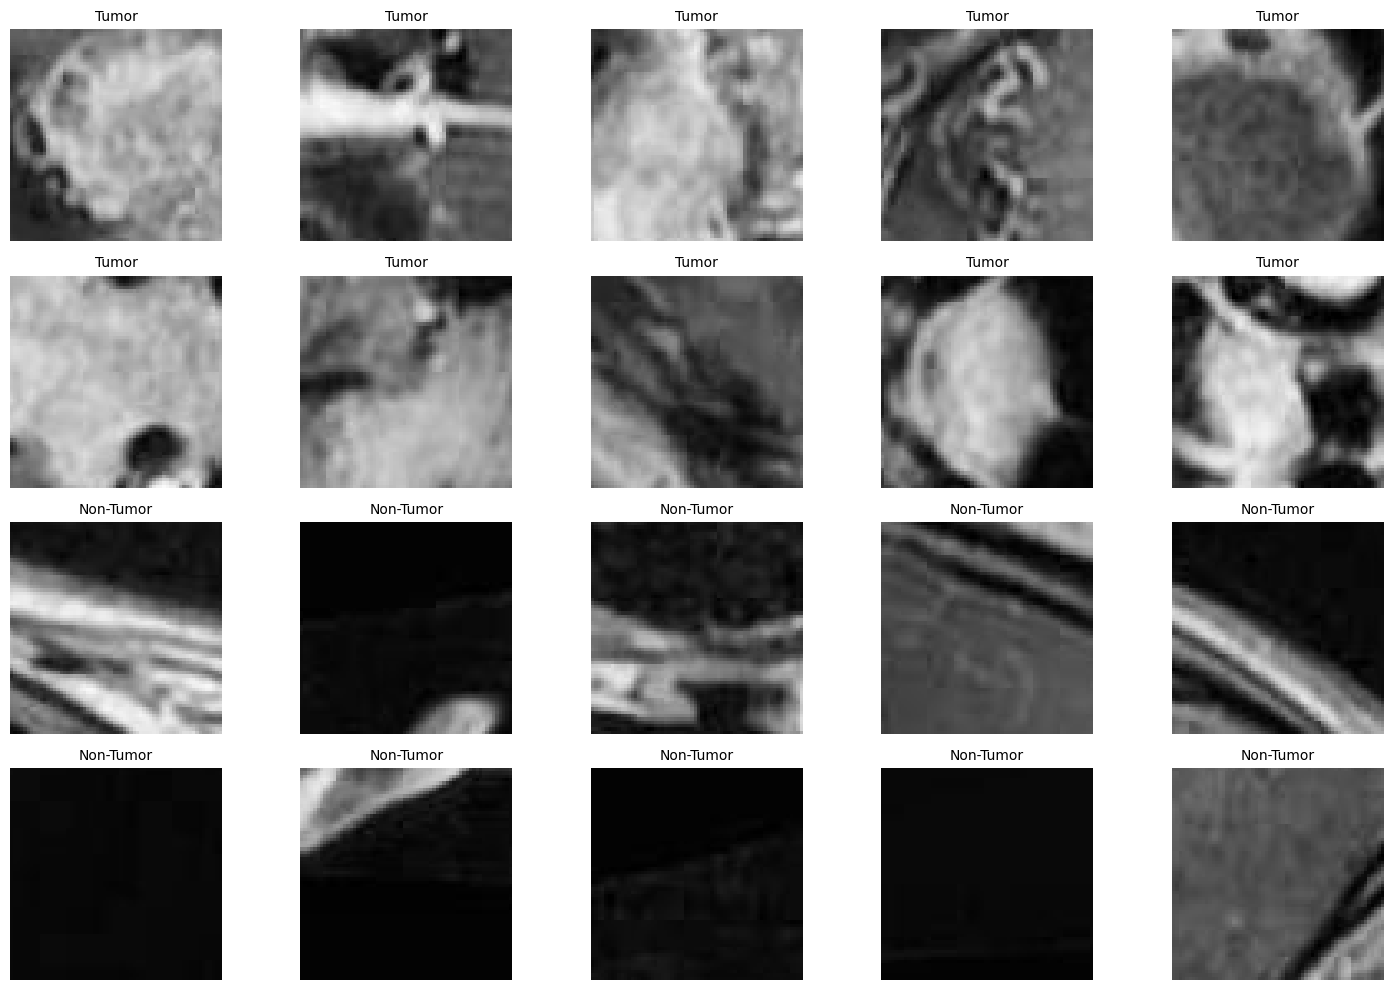

In [19]:
# Separa patches tumor e non-tumor
tumor_patches = [patch for patch, label in zip(patches_total, labels_total) 
                 if isinstance(patch, np.ndarray) and patch.size > 0 and label == 255]
non_tumor_patches = [patch for patch, label in zip(patches_total, labels_total) 
                     if isinstance(patch, np.ndarray) and patch.size > 0 and label != 255]

print(f"Tumor patches: {len(tumor_patches)}")
print(f"Non-tumor patches: {len(non_tumor_patches)}")

# Seleziona 10 patches random da ciascuna categoria
k_tumor = min(10, len(tumor_patches))
k_non_tumor = min(10, len(non_tumor_patches))

if k_tumor > 0 and k_non_tumor > 0:
    random_tumor_patches = random.sample(tumor_patches, k_tumor)
    random_non_tumor_patches = random.sample(non_tumor_patches, k_non_tumor)

    # Visualizza le patches
    plt.figure(figsize=(15, 10))

    # Plot tumor patches
    for i, patch in enumerate(random_tumor_patches):
        plt.subplot(4, 5, i + 1)
        plt.imshow(patch, cmap="gray")
        plt.title("Tumor", fontsize=10)
        plt.axis('off')

    # Plot non-tumor patches
    for i, patch in enumerate(random_non_tumor_patches):
        plt.subplot(4, 5, i + 11)
        plt.imshow(patch, cmap="gray")
        plt.title("Non-Tumor", fontsize=10)
        plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("Non ci sono abbastanza patches valide per la visualizzazione.")

since a lot of non tumors have black background, we filter them based on the mean and std.dev. intensity

In [20]:
# Filtra patches non informative (troppo scure)
def is_informative(patch):
    return patch.mean() > 30 and patch.std() > 15

filtered_tumor = [p for p in tumor_patches if is_informative(p)]
filtered_non_tumor = [p for p in non_tumor_patches if is_informative(p)]

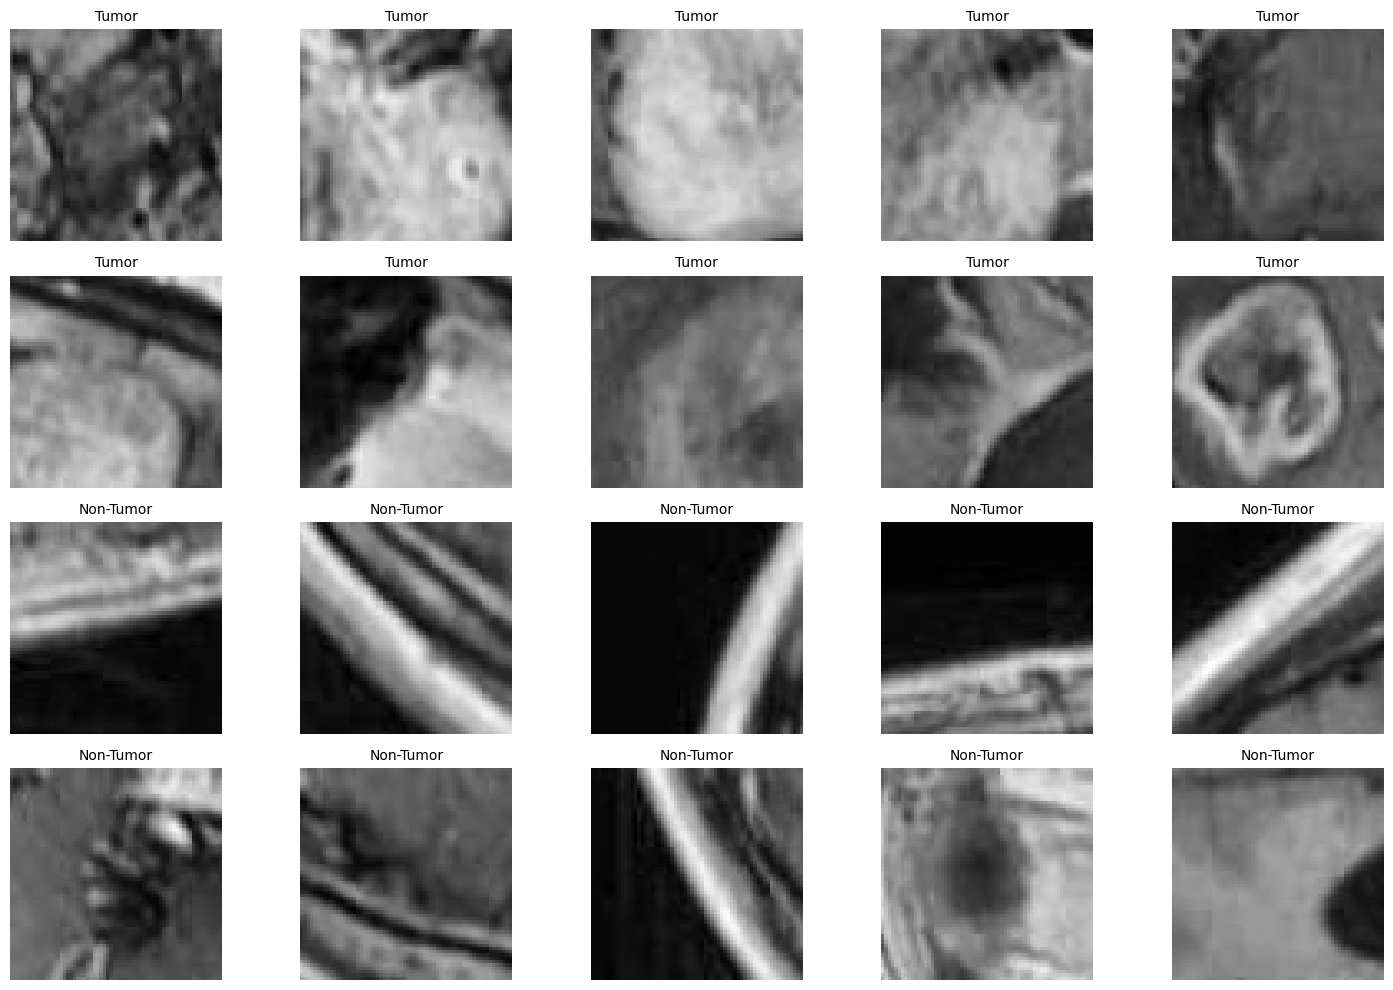

In [21]:
# Seleziona 10 patches random da ciascuna categoria
k_tumor = min(10, len(filtered_tumor))
k_non_tumor = min(10, len(filtered_non_tumor))

if k_tumor > 0 and k_non_tumor > 0:
    random_tumor_patches = random.sample(filtered_tumor, k_tumor)
    random_non_tumor_patches = random.sample(filtered_non_tumor, k_non_tumor)

    # Visualizza le patches
    plt.figure(figsize=(15, 10))

    # Plot tumor patches
    for i, patch in enumerate(random_tumor_patches):
        plt.subplot(4, 5, i + 1)
        plt.imshow(patch, cmap="gray")
        plt.title("Tumor", fontsize=10)
        plt.axis('off')

    # Plot non-tumor patches
    for i, patch in enumerate(random_non_tumor_patches):
        plt.subplot(4, 5, i + 11)
        plt.imshow(patch, cmap="gray")
        plt.title("Non-Tumor", fontsize=10)
        plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("Non ci sono abbastanza patches valide per la visualizzazione.")